In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm, skew # 수치해석 기능(확률분포) 제공
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

df = train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/ted.csv')

In [52]:
df.head()

,video_num,duration,comments,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,tags,views
0,1,1164,4553,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,"['children', 'creativity', 'culture', 'dance',...",47227110
1,2,977,265,544,139,62,58,258,113,443,413,132,56,268,116,131,203,"['alternative energy', 'cars', 'climate change...",3200520
2,3,1286,124,964,45,183,60,104,78,395,230,166,27,146,230,54,142,"['computers', 'entertainment', 'interface desi...",1636292
3,4,1116,200,760,291,32,59,105,36,53,380,1070,132,460,230,35,85,"['MacArthur grant', 'activism', 'business', 'c...",1697550
4,5,1190,593,3202,1390,942,318,110,72,67,5433,2893,4606,3736,2542,248,61,"['Africa', 'Asia', 'Google', 'demo', 'economic...",12005869


In [53]:
df.columns

Index(['video_num', 'duration', 'comments', 'Funny', 'Beautiful', 'Ingenious',
       'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating',
       'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious',
       'Inspiring', 'tags', 'views'],
      dtype='object')

video_num: 강연을 구분하기 위한 번호 (필요 없는 데이터)

duration: 강연의 길이. 시간의 단위는 초

comments: 시청자들의 댓글/감상평 수

Funny: 연사가 재미있었다는 평의 수

Beautiful: 강연이 아름다웠다는 평의 수

Indeginous: 연사가 똑똑해 보였다는 평의 수

Courageous: 연사가 용기를 줬다는 평의 수

Longwinded: 연사가 말을 장황하게 했다는 평의 수

Confusing: 강연 내용이 혼란스러웠다는 평의 수

Informative: 강연 내용이 유익했다는 평의 수

Fascinating: 강연 내용이 매력적이었다는 평의 수

Unconvincing: 강연 내용이 납득이 잘 안간다는 평의 수

Persuasive: 강연이 설득력 있었다는 평의 수

Jaw-dropping: 강연 내용이 놀라웠다는 평의 수

OK: 강연 내용이 만족스러웠다는 평의 수

Obnoxious: 강연 내용이 불쾌했다는 평의 수

Inspiring: 강연 내용이 동기부여적이었다는 평의 수

tags: 강연을 구분짓기 위한 태그들 (범주형 데이터)

**views: 시청자들이 강연을 시청한 횟수 (예측해야할 종속변수)**

In [54]:
df.shape

(2550, 19)

In [55]:
df['video_num'].values # 필요없는 데이터임 지우자.

array([   1,    2,    3, ..., 2548, 2549, 2550])

In [0]:
x=df.drop(['video_num','views','tags'],axis=1) # 'tags' 변수의 활용방안을 생각할 필요가 있을 듯.
y=df['views']

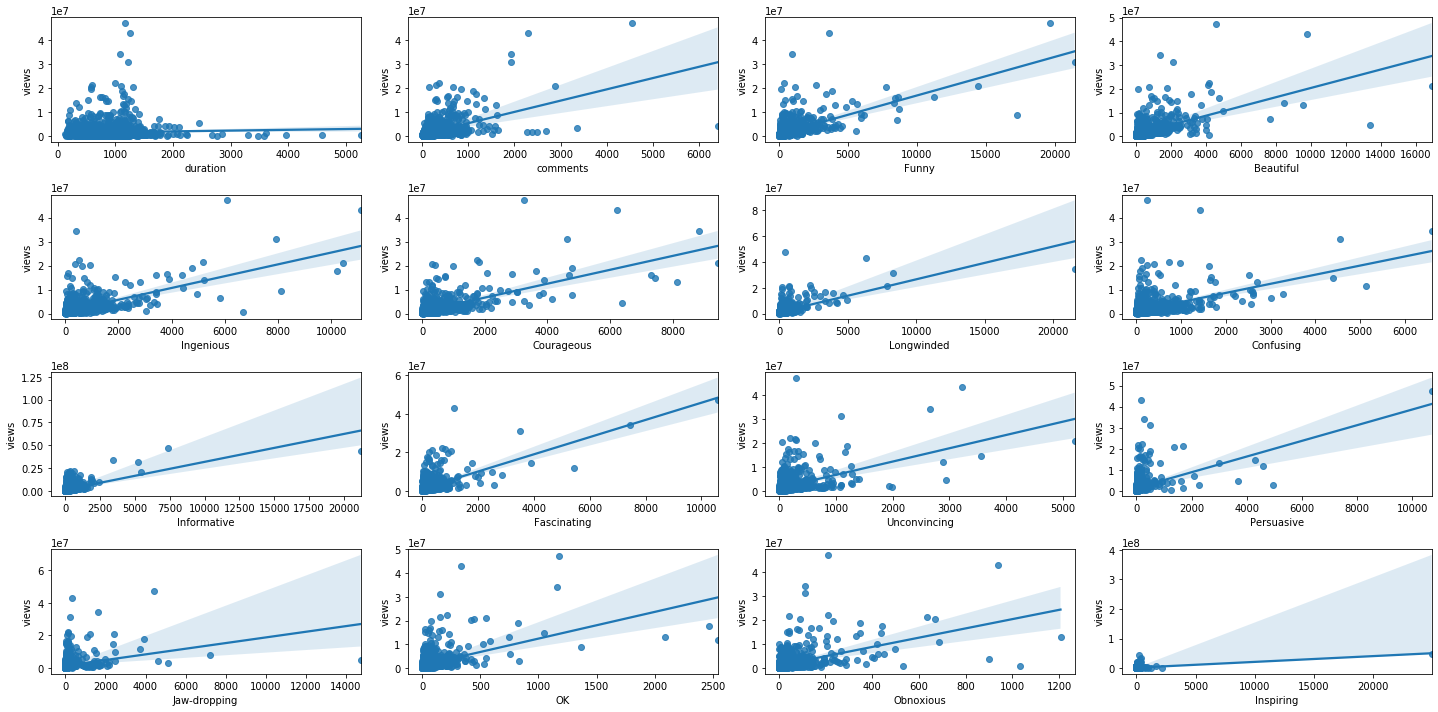

In [57]:
fig, axs = plt.subplots(figsize=(20,10),ncols=4,nrows=4)
lm_featrues = ['duration', 'comments', 'Funny', 'Beautiful', 'Ingenious',
       'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating',
       'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious',
       'Inspiring']
for i, feature in enumerate(lm_featrues):
  row = int(i/4)
  col = i%4

  sns.regplot(x=feature,y='views',data=df,ax=axs[row][col])
plt.tight_layout()

In [0]:
# train, test(모델 성능 확인을 위해) 분리

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [59]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2040, 16)
(2040,)
(510, 16)
(510,)


# 모델링 및 y값 분포 확인

In [60]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('훈련 세트 점수:{:.2f}'.format(lr.score(X_train,y_train)))
print('테스트 세트 점수:{:.2f}'.format(lr.score(X_test,y_test)))

print('MSE:{0:.3f},RMSE:{1:.3f}'.format(mse,rmse))
print('Variance score:{0:3f}'.format(r2_score(y_test,y_preds)))

훈련 세트 점수:0.78
테스트 세트 점수:0.71
MSE:1116025124432.091,RMSE:1056420.903
Variance score:0.712593


MSE가 꽤 크게 나타나는 것 같음.
- 실제값과 예측값이 얼마나 차이가 나는지 확인해보는 것이 좋을 것 같다.

In [0]:
def get_top_error_data(y_test,pred,n_tops=10):
  # DataFrame의 칼럼으로 실제 views의 값과 예측값을 서로 비교할 수 있도록 생성.
  result_df = pd.DataFrame(y_test.values,columns=['real_views'])
  result_df['predicted_views'] = np.round(pred)
  result_df['diff'] = np.abs(result_df['real_views']-result_df['predicted_views'])

  # 예측값과 실제 값이 가장 큰 데이터 순으로 출력.
  print(result_df.sort_values('diff',ascending=False)[:n_tops])

In [63]:
get_top_error_data(y_test,y_preds,n_tops=20)

     real_views  predicted_views        diff
495    15601385        2280656.0  13320729.0
408     8688241        2166682.0   6521559.0
219    17629275       12839360.0   4789915.0
291     8958850        4457394.0   4501456.0
95      9315483       13601959.0   4286476.0
158     4962607        1335733.0   3626874.0
185     5711833        2148803.0   3563030.0
357     8879917        5613859.0   3266058.0
177     8360707        5130471.0   3230236.0
446    14566463       11535535.0   3030928.0
358    14689301       11695441.0   2993860.0
297     1152886        4111976.0   2959090.0
176     6263759        3304757.0   2959002.0
85      4843480        2101925.0   2741555.0
505     2561564        5070505.0   2508941.0
172     8838874        6455227.0   2383647.0
250     4374792        6693673.0   2318881.0
366     7271730        4973105.0   2298625.0
24      4883112        2639871.0   2243241.0
398     4811180        2710344.0   2100836.0


실제 값을 감안하면 예측 오류가 꽤 큰 것으로 보임.
- Target 값의 분포가 왜곡된 형태를 이루고 있는지 확인을 해봐야 할 것 같음.
- Target 값은 정규 분포 형태가 가장 좋음.
 - 왜곡된 경우에는 회귀 예측 성능이 저하되는 경우가 발생하기 쉬움.

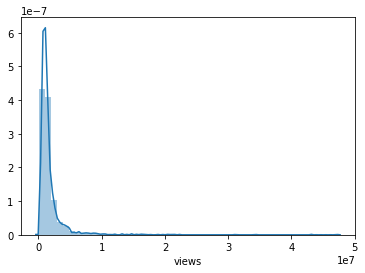

In [64]:
sns.distplot(y)

views 컬럼이 정규분포가 아닌 0~1 사이에 왜곡돼 있는 것을 알 수 있음.
- 로그변환을 통해 정규 분포 형태로 바꾸자.

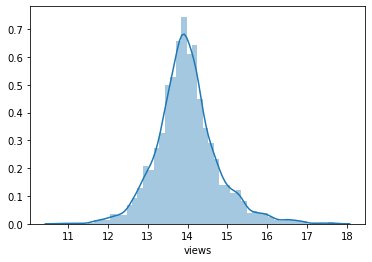

In [65]:
y_log_transform = np.log1p(y)
sns.distplot(y_log_transform)

왜곡 정도가 많이 향상됐음.

In [66]:
# 로그 변환된 y값을 사용하여 학습한 후 평가
X_train,X_test,y_train,y_test = train_test_split(x,y_log_transform,test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

# 테스트 데이터 셋의 Target값은 로그 변환 됐으므로 다시 expm1을 이용해 원래 스케일로 변환
y_test_exp = np.expm1(y_test)

# 예측된 값 또한 로그 변환된 Target을 기반으로 예측을 했기 때문에 다시 expm1을 이용해 원래 스케일로 변환
pred_exp = np.expm1(pred)

mse = mean_squared_error(y_test_exp,pred_exp)
rmse = np.sqrt(mse)

print('훈련 세트 점수:{:.2f}'.format(lr.score(X_train,y_train)))
print('테스트 세트 점수:{:.2f}'.format(lr.score(X_test,y_test)))

print('MSE:{0:.3f},RMSE:{1:.3f}'.format(mse,rmse))
print('Variance score:{0:3f}'.format(r2_score(y_test_exp,pred_exp)))

훈련 세트 점수:0.43
테스트 세트 점수:0.41
MSE:13259776521985.838,RMSE:3641397.606
Variance score:-2.414755


MSE, RMSE 둘다 오히려 증가를 했다. 이유가 뭘까..?
- 독립변수들의 피처의 회귀 계수 값을 시각화 해보자.
- Score를 보면 과소적합인 것 같음. 전처리를 해서 Score를 올려보자.

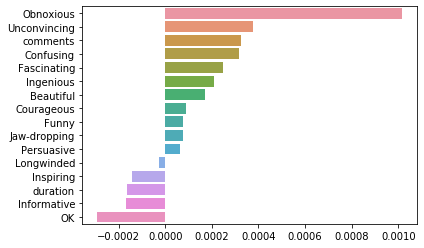

In [67]:
coef = pd.Series(lr.coef_,index=x.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values,y=coef_sort.index)

Obnoxious(강연 내용이 불쾌했다는 평의 수)가 독보적으로 높은 이유가 뭘까?
- 이제 데이터 전처리를 하면서 각각의 변수들을 하나씩 다뤄보자.

# Data Preprocessing

In [22]:
df.isnull().sum() # 결측치 X

video_num       0
duration        0
comments        0
Funny           0
Beautiful       0
Ingenious       0
Courageous      0
Longwinded      0
Confusing       0
Informative     0
Fascinating     0
Unconvincing    0
Persuasive      0
Jaw-dropping    0
OK              0
Obnoxious       0
Inspiring       0
tags            0
views           0
dtype: int64

In [0]:
# cols=df.drop('tags',axis=1).columns
# sns.pairplot(df[cols],height=2.5)
# plt.tight_layout()
# plt.show()

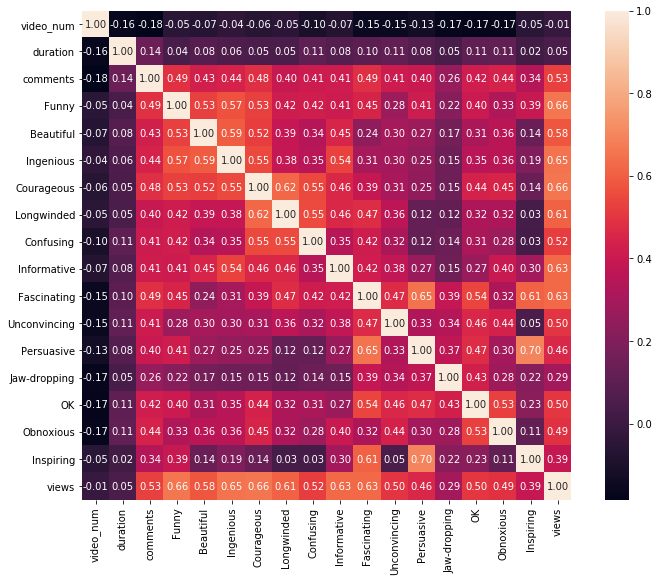

In [38]:
cm = np.corrcoef(df[cols].values.T)
plt.subplots(figsize=(12,9))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 #annot_kws={'size':20},
                 yticklabels=cols,
                 xticklabels=cols)

1. 상관계수가 높은 변수들만 뽑아 파생변수를 만들어 보자.
2. 다항회귀 방법을 적용하여 비선형 관계 모델링을 적용해 보자.

## 1. 상관계수가 높은 변수들만 뽑아 파생변수를 만들어 모델링

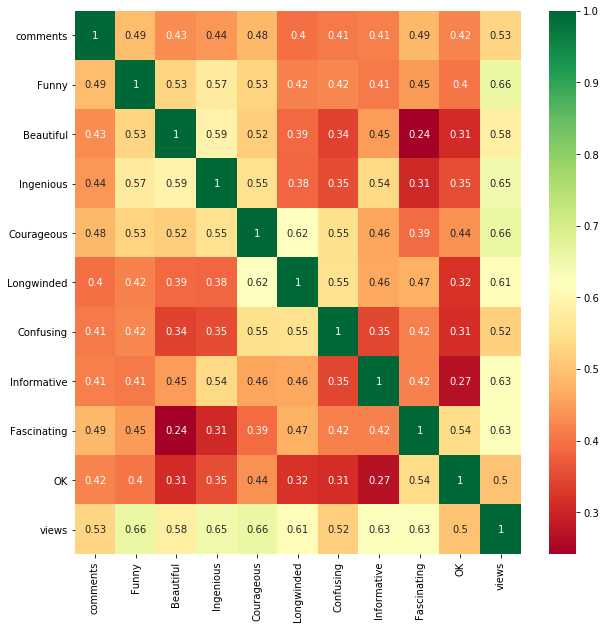

In [69]:
# views와 상관관계가 높은 feature만 뽑아보자.
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["views"])>0.5]
plt.figure(figsize=(10,10),facecolor='w')
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
df_tcr= df[top_corr_features]

In [84]:
# 파생변수 제작
col_list = df_tcr.drop('views',axis=1).columns

for col_1 in col_list:


Index(['comments', 'Funny', 'Beautiful', 'Ingenious', 'Courageous',
       'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'OK'],
      dtype='object')

## 2. 다항회귀 방법을 적용하여 비선형 관계 모델링을 적용